In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('pulsar_stars.csv')
df.columns= [ 'MIP', 'STDIP','EKIP','SIP','MC','STDC','EKC','SC','TARGET']
df.head()

,MIP,STDIP,EKIP,SIP,MC,STDC,EKC,SC,TARGET
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [6]:
df.info()
train.mean()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MIP     17898 non-null  float64
 1   STDIP   17898 non-null  float64
 2   EKIP    17898 non-null  float64
 3   SIP     17898 non-null  float64
 4   MC      17898 non-null  float64
 5   STDC    17898 non-null  float64
 6   EKC     17898 non-null  float64
 7   SC      17898 non-null  float64
 8   TARGET  17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


NameError: name 'train' is not defined

In [7]:
train = df[((df['TARGET']==0) & (df['MIP']>= 101.390625) & (df['MIP']<= 101.859375)) | ((df['TARGET']==1) & (df['MIP']>= 83.7734375) & (df['MIP']<= 92.6015625))]

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 150 to 17647
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MIP     206 non-null    float64
 1   STDIP   206 non-null    float64
 2   EKIP    206 non-null    float64
 3   SIP     206 non-null    float64
 4   MC      206 non-null    float64
 5   STDC    206 non-null    float64
 6   EKC     206 non-null    float64
 7   SC      206 non-null    float64
dtypes: float64(8)
memory usage: 14.5 KB


In [9]:
train.mean()

MIP       94.907236
STDIP     44.767972
EKIP       0.781967
SIP        1.561537
MC        17.283437
STDC      33.922561
EKC        6.855438
SC        76.199389
TARGET     0.490291
dtype: float64

In [10]:
from sklearn.preprocessing import MinMaxScaler
train.drop(columns=['TARGET'], inplace = True)
scal = MinMaxScaler()
train_scaler = scal.fit_transform(train)

/root/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
np.mean(train_scaler[:,0])

0.6156052758497765

In [14]:
star = [0.058,0.224,0.63,0.81,0.85,0.391,0.896,0.819]
min = 100000
x = np.linalg.norm(train_scaler - star, axis = 1)
np.min(x)

1.1520451596271928

### LAB 3
* Giảm chiều dữ liệu giúp cho việc Visualization dễ hơn, phát hiện feauture ẩn và giảm sự tính toán của máy tính
* Làm mất thông tin từ dữ liệu gốc
-> Cần thực hiện đánh giá số chiều giữ lại phù hợp
* use variance để đánh giá sai số

In [15]:
df = pd.read_csv('17_36.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,18.243573,-22.653569,22.309877,7.419915,11.340017,14.677879,21.710079,-16.044916,14.837784,17.603029
1,-9.430238,1.678058,-14.467071,-20.550316,12.975133,6.637655,8.554817,2.305051,-22.680074,-7.981434
2,-10.022883,3.002050,-6.020823,16.048245,-2.825655,-20.018559,-16.333980,-20.734059,11.240637,-8.921219
3,-7.762322,4.105197,-15.804436,-23.349555,15.150950,5.703130,5.286390,3.110961,-24.790528,-8.042308
4,24.246152,-20.563063,19.739461,16.921785,-21.934323,8.019478,4.082214,6.760828,-4.147755,-11.343656


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       60 non-null     float64
 1   1       60 non-null     float64
 2   2       60 non-null     float64
 3   3       60 non-null     float64
 4   4       60 non-null     float64
 5   5       60 non-null     float64
 6   6       60 non-null     float64
 7   7       60 non-null     float64
 8   8       60 non-null     float64
 9   9       60 non-null     float64
dtypes: float64(10)
memory usage: 4.8 KB


In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pca.fit_transform(df)

In [18]:
data[0,:]

array([ 25.23847803, -29.26662557])

Phương sai: Đây là thước đo độ biến thiên hoặc đơn giản là đo lường mức độ lan truyền của tập dữ liệu. Về mặt toán học, nó là độ lệch bình phương trung bình so với điểm trung bình.

In [19]:
pca.explained_variance_
# giá trị của sai số với mỗi chiều đc chọn: 1,2 dims 


array([820.13357632, 618.99973724])

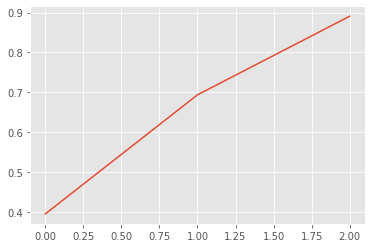

In [22]:
pca = PCA(n_components=3)
data = pca.fit_transform(df)
plt.pyplot.plot(pca.explained_variance_ratio_.cumsum())
# đồ thị biểu hiện phần trăm dữ liệu bị mất phụ thuộc vào số chiều đc chọn để giảm kích thước
# 1,2,3,4,5,6,7,8,9,10 dims


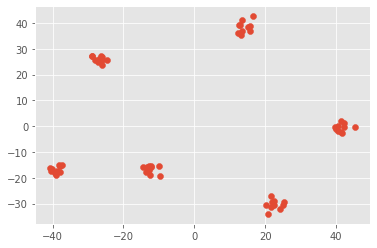

In [26]:
plt.pyplot.scatter(data[:,0], data[:,1])

In [67]:
X = pd.read_csv('X_loadings_417.csv',header=None, sep=';')
Y = pd.read_csv('X_reduced_417.csv',header=None, sep=';')

In [60]:
X.shape, Y.shape

((99, 1), (99, 1))

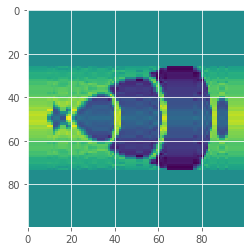

In [69]:
plt.pyplot.imshow(np.dot(X.values, Y.values.T))

In [68]:
X.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.180669e-17,1.279354e-17,5.879625e-18,-2.441192e-17,-1.186938e-17,2.082969e-17,6.411222e-19,2.523464e-17,-8.212252e-18,-1.646290e-17
1,-2.220446e-16,0.000000e+00,8.326673e-17,4.163336e-17,6.938894e-18,-1.040834e-16,2.387413e-16,-9.714451e-17,-4.336809e-17,-3.295975e-17
2,-0.000000e+00,0.000000e+00,0.000000e+00,-5.551115e-17,-6.938894e-17,-0.000000e+00,1.908196e-17,-5.551115e-17,7.285839e-17,-3.469447e-17
3,-0.000000e+00,0.000000e+00,8.326673e-17,-3.330669e-16,-1.110223e-16,5.551115e-17,1.474515e-17,1.110223e-16,1.040834e-16,-4.163336e-17
4,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.775558e-17,-2.775558e-17,-8.500145e-17,-1.110223e-16,-2.775558e-17,-2.775558e-17


#LAB 4 
* read txt file to create pandas

In [28]:
f = open("file.txt","r")
f.readline()
x = []
y = []
for file in f:
    arg = file.rstrip("\n\r").split(",")
    x.append(int(arg[1]))
    y.append(int(arg[2]))

In [29]:
x_np  = np.array(x)
y_np  = np.array(y)
x_np.shape, y_np.shape

((10,), (10,))

In [30]:
x_np.mean(), y_np.mean()

(11.4, 28.7)

In [34]:
from sklearn.linear_model import LinearRegression
lig  = LinearRegression()
lig.fit(np.reshape(x_np,[-1,1]),y_np)
#y_pred = lig.predict(x)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
lig.coef_

array([2.30393199])

In [36]:
lig.intercept_

2.435175345377253

In [37]:
lig.score(np.reshape(x_np,[-1,1]),y_np)

0.8863714206739393

TASK 2

In [38]:
df = pd.read_csv('candy-data.csv')
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    70 non-null     object 
 1   chocolate         70 non-null     int64  
 2   fruity            70 non-null     int64  
 3   caramel           70 non-null     int64  
 4   peanutyalmondy    70 non-null     int64  
 5   nougat            70 non-null     int64  
 6   crispedricewafer  70 non-null     int64  
 7   hard              70 non-null     int64  
 8   bar               70 non-null     int64  
 9   pluribus          70 non-null     int64  
 10  sugarpercent      70 non-null     float64
 11  pricepercent      70 non-null     float64
 12  winpercent        70 non-null     float64
 13  Y                 70 non-null     int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 7.8+ KB


In [40]:
train = df[(df['competitorname']!='Chewey Lemonhead Fruit Mix') & (df['competitorname']!='Kit Kat')].drop(columns=['competitorname', 'winpercent', 'Y']).values
value = df[(df['competitorname']!='Chewey Lemonhead Fruit Mix') & (df['competitorname']!='Kit Kat')]['winpercent'].values

In [41]:
from sklearn.linear_model import LinearRegression
lig  = LinearRegression()
np.random.seed = 2019
lig.fit(train,value)
#y_pred = lig.predict(x)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
lig.predict(df[df['competitorname'] == 'Chewey Lemonhead Fruit Mix'].values[0][1:12].reshape(1,-1))

array([48.08550479])

In [45]:
lig.predict(df[df['competitorname'] == 'Kit Kat'].values[0][1:12].reshape(1,-1))

array([62.23575943])

In [46]:
lig.predict(np.array([0,0,0,1,0,1,0,1,1,0.543,0.402]).reshape(1,-1))


array([45.56983495])

### Lab 5

In [48]:
df = pd.read_csv('candy-data.csv')
test = pd.read_csv('candy-test.csv')
df.head()


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1


In [49]:
train = df[(df['competitorname']!='Charleston Chew') & \
           (df['competitorname']!='Nerds') & \
           (df['competitorname']!='Nik L Nip')].drop(columns=['competitorname', 'Y','winpercent']).values
value = df[(df['competitorname']!='Charleston Chew') & \
           (df['competitorname']!='Nerds') & (df['competitorname']\
                                                          !='Nik L Nip')]['Y'].values
pred = test.drop(columns=['competitorname', 'Y']).values
ypred = test['Y'].values

In [50]:
train[1]

array([1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.60399997,
       0.51099998])

In [51]:
from sklearn.linear_model import LogisticRegression
lig  = LogisticRegression(solver= 'lbfgs',random_state=2019)
lig.fit(train,value)
#y_pred = lig.predict(x)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2019, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
lig.predict_proba(test[test['competitorname'] == 'Tootsie Roll Midgies'].values[0][1:12].reshape(1,-1))

array([[0.31662452, 0.68337548]])

In [54]:
lig.predict_proba(test[test['competitorname'] == 'Trolli Sour Bites'].values[0][1:12].reshape(1,-1))

array([[0.64986312, 0.35013688]])

In [155]:
from sklearn.metrics import classification_report
print(classification_report(lig.predict(pred),ypred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.60      0.50      0.55         6

    accuracy                           0.67        15
   macro avg       0.65      0.64      0.64        15
weighted avg       0.66      0.67      0.66        15



In [55]:
from sklearn.metrics import recall_score
recall_score(lig.predict(pred),ypred)

0.6

In [56]:
from sklearn.metrics import precision_score
print(precision_score(lig.predict(pred),ypred))

0.6


In [57]:
from sklearn.metrics import auc, roc_curve
fpr, tpr, thresholds = roc_curve(lig.predict(pred),ypred, pos_label=1)
auc(fpr, tpr)

0.7000000000000002

### LAB 5

In [58]:
#LAB 5
import numpy as np

In [9]:
x = [96,76,98,89,87,31,73,33,87,81]
y = [11,24,11,71,99,40,35,30,88,30]

In [10]:
k = [68,46]
def elib(x , y,x1,y1):
    return np.sqrt((x-x1)**2 + (y-y1)**2)
    

In [16]:
id = []
rang = list(range(len(x)))
for i in range(9):
    min = elib(k[0],k[1], x[rang[0]],y[rang[0]])
    idx = rang[0]
    for i in rang:
        if elib(k[0],k[1], x[i],y[i]) < min:
            min = elib(k[0],k[1], x[i],y[i])
            idx = i
    rang.remove(idx)

    print(min, "  ", idx)

12.083045973594572    6
20.615528128088304    9
23.40939982143925    1
32.64965543462902    3
37.48332962798263    5
38.48376280978771    7
44.82186966202994    0
46.09772228646444    2
46.09772228646444    8


In [17]:
def elib(x , y,x1,y1):
    return (abs(x-x1) + abs(y-y1))
    
id = []
rang = list(range(len(x)))
for i in range(9):
    min = elib(k[0],k[1], x[rang[0]],y[rang[0]])
    idx = rang[0]
    for i in rang:
        if elib(k[0],k[1], x[i],y[i]) < min:
            min = elib(k[0],k[1], x[i],y[i])
            idx = i
    rang.remove(idx)

    print(min, "  ", idx)

16    6
29    9
30    1
43    5
46    3
51    7
61    8
63    0
65    2
